**Get kaggle.json form kaggle and configure the path in the project**

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Downloading dataset from Kaggle using API command**

In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100%|███████████████████████████████████████▉| 163M/163M [01:39<00:00, 1.25MB/s]
100%|████████████████████████████████████████| 163M/163M [01:39<00:00, 1.71MB/s]


**Unzipping the zipped dataset**

In [8]:
from zipfile import ZipFile
dataset = 'face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Importing the dependencies**

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

**Setting Path to dataset**

In [12]:
with_mask_files = os.listdir('data/with_mask')

without_mask_files = os.listdir('data/without_mask')

**Getting the number of files from each data**

In [13]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Lables**<br/>
   1 -> with mask<br/>
   0 -> without mask

In [14]:
with_mask_labels = [1]*len(with_mask_files)

without_mask_labels = [0]*len(without_mask_files)

In [15]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Display images**

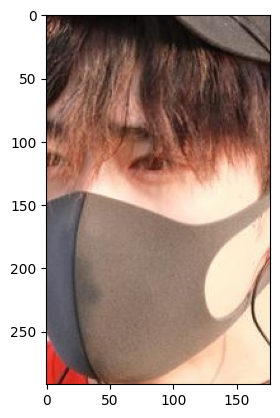

In [18]:
img = mpimg.imread('data/with_mask/with_mask_1525.jpg')
imgplot = plt.imshow(img)
plt.show()

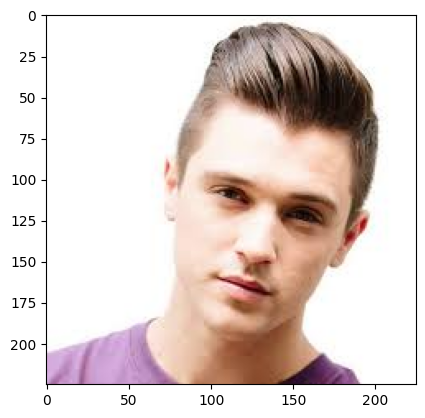

In [19]:
img = mpimg.imread('data/without_mask/without_mask_2825.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**
1. Resize the Images
2. Convert the images to numpy arrays

In [46]:
# convert images to numpy arrays

data = []

with_mask_path = 'data/with_mask/'
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = 'data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/Users/sleepdeprived/miniforge3/envs/se/lib/python3.10/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [47]:
data[0].shape

(128, 128, 3)

**Converting image list and label list to numpy arrays**

In [48]:
X = np.array(data)
Y = np.array(labels)

**Test Train Split**

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

**Scaling the data**

In [50]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

**Building the Convolutional Neural Networks (CNN)**

**Imports**

In [51]:
import tensorflow as tf
from tensorflow import keras

In [52]:
num_of_classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

**Compiling the nerual network**

In [53]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [54]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - acc: 0.7254 - loss: 0.6010 - val_acc: 0.8694 - val_loss: 0.3196
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - acc: 0.8825 - loss: 0.3058 - val_acc: 0.8777 - val_loss: 0.3071
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - acc: 0.9019 - loss: 0.2488 - val_acc: 0.8694 - val_loss: 0.3118
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - acc: 0.9212 - loss: 0.2067 - val_acc: 0.8959 - val_loss: 0.2897
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - acc: 0.9419 - loss: 0.1653 - val_acc: 0.8975 - val_loss: 0.2376


In [55]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9357 - loss: 0.1917
Test Accuracy = 0.9364659190177917


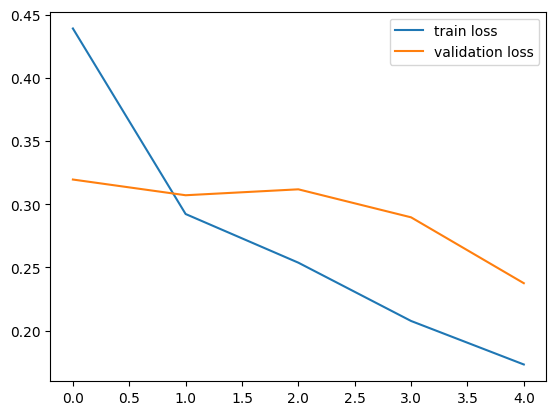

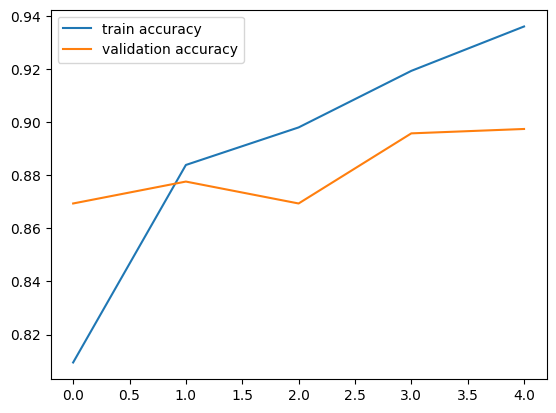

In [56]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [57]:
import pickle

In [58]:
pickle.dump(model,open('trained_model.sav','wb'))